In [1]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

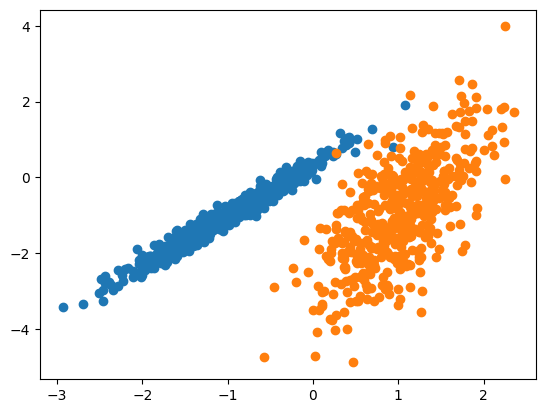

In [18]:
# generate the dummy dataset. We will only have two features, because we can plot only two dimensions :)
X,y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# loop through the two classes and plot them
for class_value in range(2):
  row_ix = where(y==class_value)
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1]) # x axis has feature no 1 and y axis has feature no 2

pyplot.show()

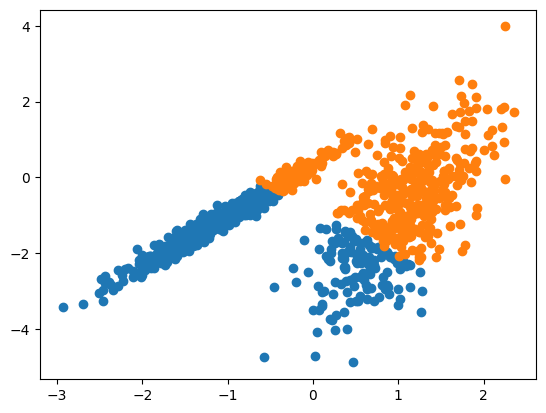

In [3]:
from numpy.ma.extras import unique
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)
for cluster in clusters:
  row_ix = where(yhat==cluster)
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

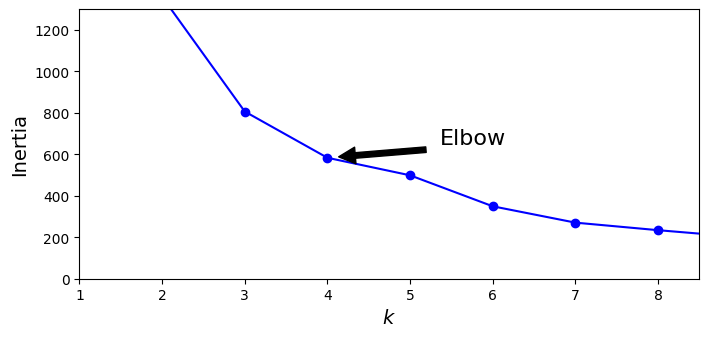

In [7]:
import matplotlib.pyplot as plt


inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [5]:
from sklearn.metrics import silhouette_score
silhouette_score(X, yhat)

np.float64(0.4226907577348386)

[np.float64(0.4226907577348386), np.float64(0.48885199741219676), np.float64(0.4678997710674995), np.float64(0.4417597405028072), np.float64(0.4589185826588714), np.float64(0.4585003447905865), np.float64(0.4496273198440967), np.float64(0.4313199614591007)]


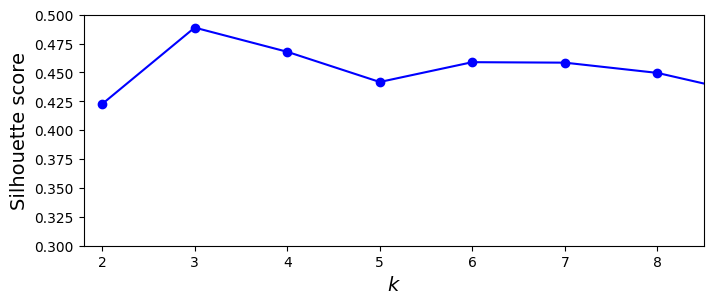

In [17]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
print(silhouette_scores)
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.3, 0.5])
plt.show()

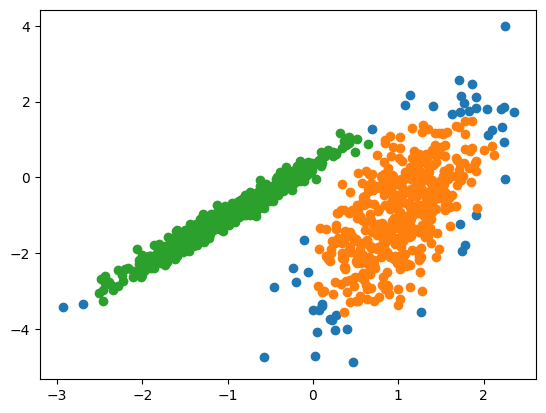

In [8]:
from numpy.ma.extras import unique
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=9)


yhat = model.fit_predict(X)

clusters = unique(yhat)
for cluster in clusters:
  row_ix = where(yhat==cluster)
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [20]:
!pip install numpy==1.26.4  pyyaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [2]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.9 MB/s eta 0:00:00


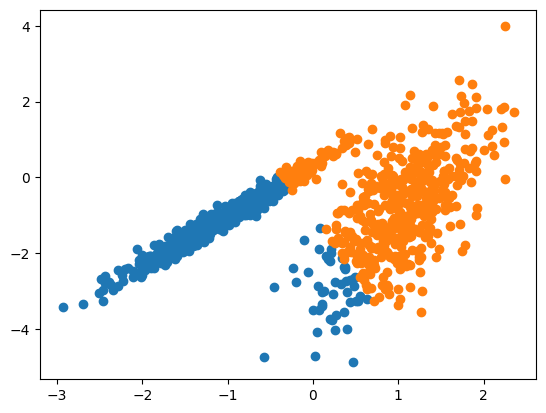

In [9]:
from sklearn_extra.cluster import KMedoids
model = KMedoids(n_clusters=2, random_state=0).fit(X)

yhat = model.fit_predict(X)

clusters = unique(yhat)
for cluster in clusters:
  row_ix = where(yhat==cluster)
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [ ]:
# try out some other clustering algorithms. Check this link out:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [1]:
import numpy
print(numpy.__version__)

1.26.4


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
image = imread("ladybug.png")

In [3]:
image.shape

(533, 800, 3)

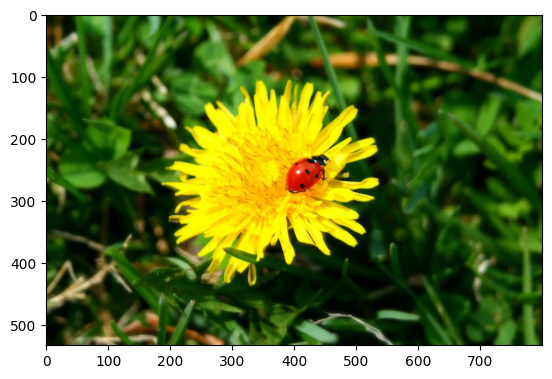

In [5]:
plt.imshow(image)

In [4]:
x = image.reshape(-1,3)
x.shape

(426400, 3)

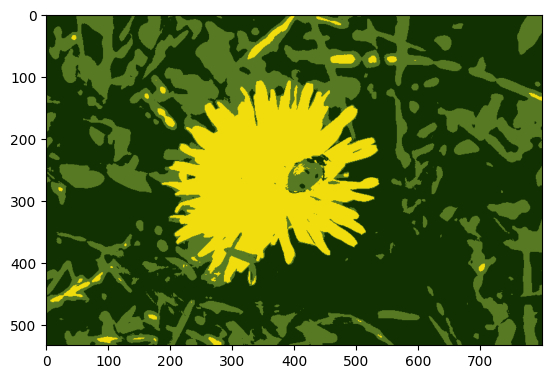

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(x)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)

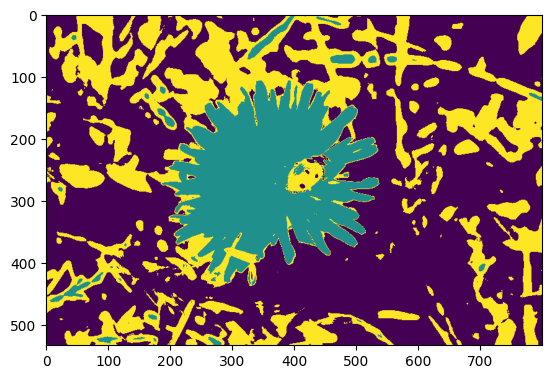

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(x)
labels = kmeans.labels_

segmented_image = labels.reshape(image.shape[:2])
plt.imshow(segmented_image)

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.01, min_samples=100)
yhat = dbscan.fit(x)

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [1]:
labels = yhat.labels_

segmented_image = labels.reshape(image.shape[:2])
plt.imshow(segmented_image)

NameError: name 'yhat' is not defined